# Grid Search with Cross Validation

While the method of splitting the data into a training, a validation, and a test set that we just saw is workable, and relatively commonly used, it is quite sensitive to how exactly the data is split. From the output of the previous code snippet we can see that GridSearchCV selects 'C': 10, 'gamma': 0.001 as the best parameters, while the output of the code in the previous section selects 'C': 100, 'gamma': 0.001 as the best parameters. For a better estimate of the generalization performance, instead of using a single split into a training and a validation set, we can use cross-validation to evaluate the performance of each parameter combination. This method can be coded up as follows:


In [10]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np

iris=load_iris()
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,random_state=0)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,random_state=0)

In [12]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]: 
    for C in [0.001, 0.01, 0.1, 1, 10, 100]: 
        # for each combination of parameters,
        # train an SVC
        svm = SVC(gamma=gamma, C=C) 
        # perform cross-validation  
        scores = cross_val_score(svm, X_val, y_val, cv=5) 
        # compute mean cross-validation accuracy 
        score = np.mean(scores) 
        # if we got a better score, store the score and parameters   
        if score > best_score:    
            best_score = score   
            best_parameters = {'C': C, 'gamma': gamma} 
            # rebuild a model on the combined training and validation set 
svm = SVC(**best_parameters) 
svm.fit(X_val, y_val) 

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  

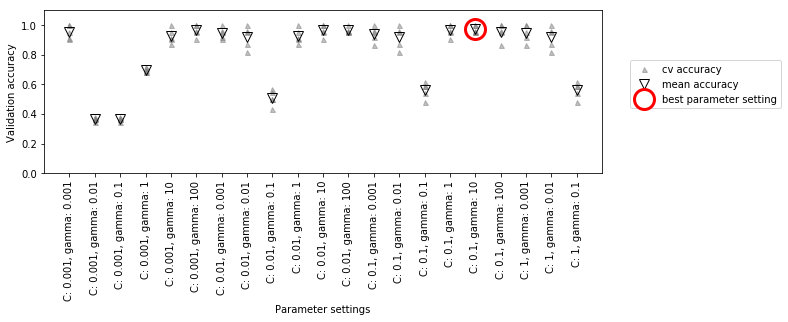

In [14]:
import mglearn
mglearn.plots.plot_cross_val_selection()

For each parameter setting (Only a subset is shown), five accuracy values are computed, one for each split in the cross-validation. Then the mean validation accuracy is computed for each parameter setting. The parameters with the highest mean validation accuracy are chosen, marked by the circle.

As we said earlier, cross-validation is a way to evaluate a given algorithm on a specific dataset. However, it is often used in conjunction with parameter search methods like grid search. For this reason, many people use the term cross-validation colloquially to refer to grid search with cross-validation.

The overall process of splitting the data, running the grid search, and evaluating the final parameters is illustrated below:

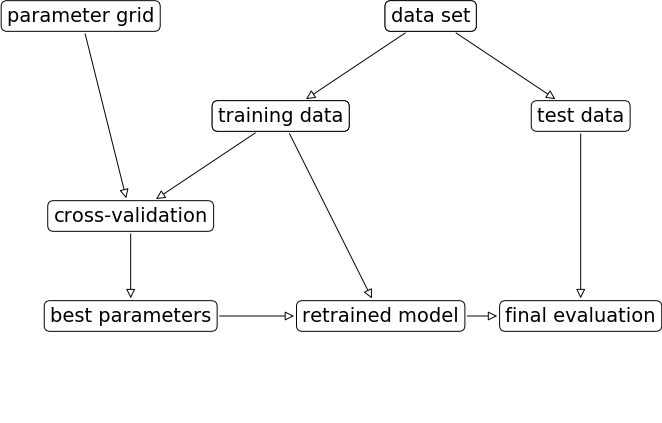

In [15]:
mglearn.plots.plot_grid_search_overview()

    Overview of the process of parameter selection and model evaluation with GridSearchCV.

Because grid search with cross-validation is such a commonly used method to adjust parameters, scikit-learn provides the GridSearchCV class, which implements it in the form of an estimator. To use the GridSearchCV class, you first need to specify the parameters you want to search over using a dictionary. GridSearchCV will then perform all the necessary model fits. The keys of the dictionary are the names of parameters we want to adjust (as given when constructing the model—in this case, C and gamma), and the values are the parameter settings we want to try out. Trying the values 0.001, 0.01, 0.1, 1, 10, and 100 for C and gamma translates to the following dictionary:


In [16]:
param_grid={'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


We can now instantiate the GridSearchCV class with the model (SVC), the parameter grid to search (param_grid), and the cross-validation strategy we want to use (say, five-fold stratified cross-validation):


In [25]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(SVC(verbose=True),param_grid,cv=5)

GridSearchCV will use cross-validation in place of the split into a training and validation set that we used before. However, we still need to split the data into a training and a test set, to avoid overfitting the parameters:


In [26]:
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,random_state=0)

The grid_search object that we created behaves just like a classifier; we can call the standard methods fit, predict, and score on it.1 However, when we call fit, it will run cross-validation for each combination of parameters we specified in param_grid:


In [27]:
grid_search.fit(X_train,y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Fitting the GridSearchCV object not only searches for the best parameters, but also automatically fits a new model on the whole training dataset with the parameters that yielded the best cross-validation performance. What happens in fit is therefore equivalent to the result of the In[21] code we saw at the beginning of this section. The GridSearchCV class provides a very convenient interface to access the retrained model using the predict and score methods. To evaluate how well the best found parameters generalize, we can call score on the test set:


In [28]:
print("Test set score: {:.2f}".format(grid_search.score(X_test,y_test)))

Test set score: 0.97


Choosing the parameters using cross-validation, we actually found a model that achieves 97% accuracy on the test set. The important thing here is that we did not use the test set to choose the parameters. The parameters that were found are scored in the best_params_ attribute, and the best cross-validation accuracy (the mean accuracy over the different splits for this parameter setting) is stored in best_score_:


In [29]:
print("Best parameter: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameter: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.97


Again, be careful not to confuse best_score_ with the generalization performance of the model as computed by the score method on the test set. Using the score method (or evaluating the output of the predict method) employs a model trained on the whole training set. The best_score_ attribute stores the mean cross-validation accuracy, with cross-validation performed on the training set.

Sometimes it is helpful to have access to the actual model that was found—for example, to look at coefficients or feature importances. You can access the model with the best parameters trained on the whole training set using the best_estimator_ attribute:


In [30]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)


Because grid_search itself has predict and score methods, using best_estimator_ is not needed to make predictions or evaluate the model.

# Analyzing the result of cross-validation 

It is often helpful to visualize the results of cross-validation, to understand how the model generalization depends on the parameters we are searching. As grid searches are quite computationally expensive to run, often it is a good idea to start with a relatively coarse and small grid. We can then inspect the results of the cross-validated grid search, and possibly expand our search. The results of a grid search can be found in the cv_results_ attribute, which is a dictionary storing all aspects of the search. It contains a lot of details, as you can see in the following output, and is best looked at after converting it to a pandas DataFrame:



In [31]:
import pandas as pd
#conver to DataFrame
results=pd.DataFrame(grid_search.cv_results_)
#show the first 5 rows
display(results.head())

c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003190,0.000746,0.000406,0.000497,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
1,0.002741,0.000684,0.000400,0.000490,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
2,0.002186,0.000402,0.000600,0.000490,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
3,0.002591,0.000489,0.000000,0.000000,0.001,1,"{'C': 0.001, 'gamma': 1}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
4,0.002392,0.000488,0.000199,0.000399,0.001,10,"{'C': 0.001, 'gamma': 10}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852


Each row in results corresponds to one particular parameter setting. For each setting, the results of all cross-validation splits are recorded, as well as the mean and standard deviation over all splits. As we were searching a two-dimensional grid of parameters (C and gamma), this is best visualized as a heat map. First we extract the mean validation scores, then we reshape the scores so that the axes correspond to C and gamma:


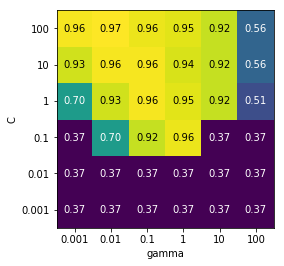

In [33]:
scores=np.array(results.mean_test_score).reshape(6,6)

#plot the mean cross validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

     Heat map of mean cross-validation score as a function of C and 
     gamma

Each point in the heat map corresponds to one run of cross-validation, with a particular parameter setting. The color encodes the cross-validation accuracy, with light colors meaning high accuracy and dark colors meaning low accuracy. You can see that SVC is very sensitive to the setting of the parameters. For many of the parameter settings, the accuracy is around 40%, which is quite bad; for other settings the accuracy is around 96%. We can take away from this plot several things. First, the parameters we adjusted are very important for obtaining good performance. Both parameters (C and gamma) matter a lot, as adjusting them can change the accuracy from 40% to 96%. Additionally, the ranges we picked for the parameters are ranges in which we see significant changes in the outcome. It’s also important to note that the ranges for the parameters are large enough: the optimum values for each parameter are not on the edges of the plot. 

Now let’s look at some plots where the result is less ideal, because the search ranges were not chosen properly:


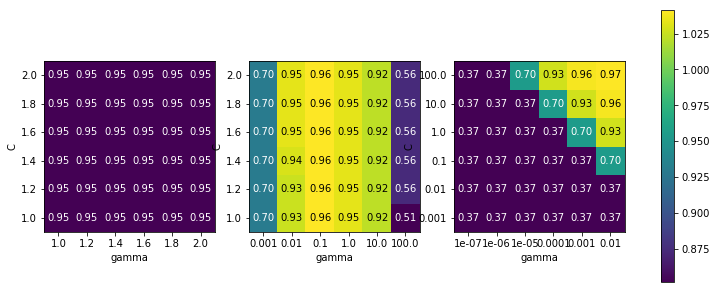

In [44]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
param_grid_linear = {'C': np.linspace(1, 2, 6),'gamma':  np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6),'gamma':  np.logspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6), 'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,param_grid_range], axes):    
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train) 
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    # plot the mean cross-validation scores  
    scores_image = mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],yticklabels=param_grid['C'], cmap="viridis", ax=ax)


plt.colorbar(score_image,ax=axes.tolist())

The first panel shows no changes at all, with a constant color over the whole parameter grid. In this case, this is caused by improper scaling and range of the parameters C and gamma. However, if no change in accuracy is visible over the different parameter settings, it could also be that a parameter is just not important at all. It is usually good to try very extreme values first, to see if there are any changes in the accuracy as a result of changing a parameter. The second panel shows a vertical stripe pattern. This indicates that only the setting of the gamma parameter makes any difference. This could mean that the gamma parameter is searching over interesting values but the C parameter is not—or it could mean the C parameter is not important. The third panel shows changes in both C and gamma. However, we can see that in the entire bottom left of the plot, nothing interesting is happening. We can probably exclude the very small values from future grid searches. The optimum parameter setting is at the top right. As the optimum is in the border of the plot, we can expect that there might be even better values beyond this border, and we might want to change our search range to include more parameters in this region.

Tuning the parameter grid based on the cross-validation scores is perfectly fine, and a good way to explore the importance of different parameters. However, you should not test different parameter ranges on the final test set—as we discussed earlier, evaluation of the test set should happen only once we know exactly what model we want to use.
